In [4]:
from trust_evaluation.probabilistic import SingleFeatureTrustModel
import matplotlib.pyplot as mlp
import numpy as np

import random
import seaborn as sns
sns.set_theme()

sftm = SingleFeatureTrustModel(name='test')
data = [random.random() for _ in range(100)]

#data = [1,1,1,1,1,1,1,1,0.8,0.8,0.8,0.8,0.8, 0.6,0.7,0.0]
#data = [0.2,0.3,0.6,0.2,0.3,0.1,0.2,0.9,0.9,0.6]
#data = [1,1,1,1,1,1,1,1,0.8,0.8,0.8,0.8,0.8, 0.6,0.7,0.0,0.0,0.0]*3
data = np.array(data)
#data = data +1 - data*2
trust_score = []
adjusted_trust_score = []
ci_max = []
ci_min = []

for i in data: 
    sftm.observe(i)
    trust_score.append(sftm.trust_score)
    adjusted_trust_score.append(sftm.adjusted_trust_score)
    ci_max.append(sftm.confidence_interval()[1])
    ci_min.append(sftm.confidence_interval()[0])





Example 1)

A random behaviour should have a trust value close to 0.5 as it is hard to understand the behaviour 

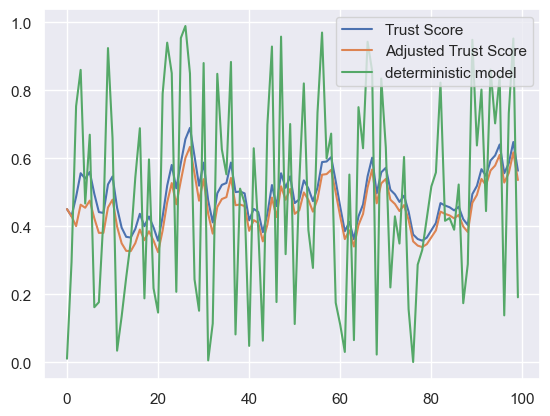

In [5]:
# ploting the trust score and adjusted trust score
mlp.plot(trust_score, label='Trust Score')
mlp.plot(adjusted_trust_score, label='Adjusted Trust Score')
mlp.plot(data, label='deterministic model')
mlp.legend()

Example 2)

A good behaviour should be rewarded, even when we have some worse performance timesteps we should keep our trust until the bad results become recurrent.

Data is going to be good results with sometime the results going below 0.5 and then the last 20 reults will be below 0.5

In [6]:
data = [
    0.85, 0.92, 0.78, 0.95, 0.88, 0.91, 0.82, 0.93, 0.89, 0.86,
    0.79, 0.94, 0.87, 0.90, 0.83, 0.96, 0.84, 0.97, 0.80, 0.98,
    0.75, 0.81, 0.99, 0.77, 0.35, 0.85, 0.92, 0.78, 0.95, 0.88,
    0.91, 0.2, 0.93, 0.89, 0.86, 0.79, 0.94, 0.87, 0.90, 0.83,
    0.96, 0.84, 0.97, 0.80, 0.98, 0.75, 0.81, 0.99, 0.77, 0.4,
    0.85, 0.92, 0.78, 0.95, 0.88, 0.91, 0.82, 0.93, 0.89, 0.86,
    0.79, 0.94, 0.1, 0.90, 0.83, 0.96, 0.84, 0.97, 0.80, 0.98,
    0.75, 0.81, 0.99, 0.77, 0.4, 0.3, 0.2, 0.45, 0.35, 0.25,
    0.4, 0.3, 0.2, 0.45, 0.35, 0.25, 0.4, 0.3, 0.2, 0.45,
    0.35, 0.25, 0.4, 0.3
]


trust_score = []
adjusted_trust_score = []
ci_max = []
ci_min = []

for i in data: 
    sftm.observe(i)
    trust_score.append(sftm.trust_score)
    adjusted_trust_score.append(sftm.adjusted_trust_score)
    ci_max.append(sftm.confidence_interval()[1])
    ci_min.append(sftm.confidence_interval()[0])

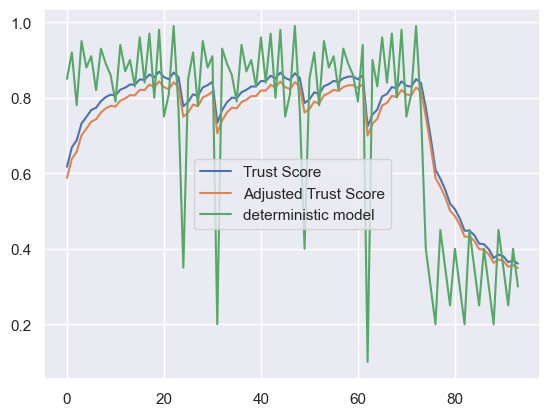

In [7]:
# ploting the trust score and adjusted trust score
mlp.plot(trust_score, label='Trust Score')
mlp.plot(adjusted_trust_score, label='Adjusted Trust Score')
mlp.plot(data, label='deterministic model')
mlp.legend()